# DISASTERS Richter's Predictor Modeling Earthquake Damage

In [1]:
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "D:\Imarticus\stat\Disasters(Richter's Predictor - Modeling Earthquake Damage)"

D:\Imarticus\stat\Disasters(Richter's Predictor - Modeling Earthquake Damage)


In [3]:
dr_tr=pd.read_csv('train_values.csv')

In [4]:
dr_tt=pd.read_csv('test_values.csv')

In [5]:
dr_labels=pd.read_csv('train_labels.csv')

In [6]:
pd.set_option('display.max_columns',40)
dr_tr.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dr_tr.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0


In [8]:
dr_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [9]:
dr_tt.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
dr_tt.tail()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
86863,310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0
86867,501372,26,36,6436,2,10,11,4,t,r,q,v,q,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
dr_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             86868 non-null  int64 
 1   geo_level_1_id                          86868 non-null  int64 
 2   geo_level_2_id                          86868 non-null  int64 
 3   geo_level_3_id                          86868 non-null  int64 
 4   count_floors_pre_eq                     86868 non-null  int64 
 5   age                                     86868 non-null  int64 
 6   area_percentage                         86868 non-null  int64 
 7   height_percentage                       86868 non-null  int64 
 8   land_surface_condition                  86868 non-null  object
 9   foundation_type                         86868 non-null  object
 10  roof_type                               86868 non-null  object
 11  gr

In [12]:
dr_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [13]:
dr_labels.tail()

,building_id,damage_grade
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2
260600,747594,3


In [14]:
dr_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [15]:
dr_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [16]:
dr_tr=dr_tr.merge(dr_labels,on='building_id')

In [17]:
dr_tr.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [18]:
dr_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [19]:
dr_tr.isnull().sum().sort_values(ascending=True)

building_id                               0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_superstructure_timber                 0
has_secondary_use_agriculture             0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_secondary_use_hotel                   0
has_superstructure_cement_mortar_brick    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_stone    0
geo_level_1_id                            0
geo_level_2_id                  

In [20]:
dr_tt.isnull().sum().sort_values(ascending=False)

building_id                               0
has_secondary_use_agriculture             0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
legal_ownership_status                    0
count_families                            0
has_secondary_use                         0
has_secondary_use_hotel                   0
has_superstructure_cement_mortar_brick    0
has_secondary_use_rental                  0
has_secondary_use_institution             0
has_secondary_use_school                  0
has_secondary_use_industry                0
has_secondary_use_health_post             0
has_secondary_use_gov_office              0
has_secondary_use_use_police              0
has_superstructure_timber                 0
has_superstructure_mud_mortar_brick       0
geo_level_1_id                            0
foundation_type                           0
geo_level_2_id                  

In [21]:
# We need to remove building_id in both train and test files because it's doesn't change prediction
dr_tr=dr_tr.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1)
dr_tt=dr_tt.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id'],axis=1)

In [22]:
dr_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 36 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   count_floors_pre_eq                     260601 non-null  int64 
 1   age                                     260601 non-null  int64 
 2   area_percentage                         260601 non-null  int64 
 3   height_percentage                       260601 non-null  int64 
 4   land_surface_condition                  260601 non-null  object
 5   foundation_type                         260601 non-null  object
 6   roof_type                               260601 non-null  object
 7   ground_floor_type                       260601 non-null  object
 8   other_floor_type                        260601 non-null  object
 9   position                                260601 non-null  object
 10  plan_configuration                      260601 non-null 

# Exploratory Data Analysis(EDA)

In [23]:
dr_tr.count_floors_pre_eq.value_counts()

count_floors_pre_eq
2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count, dtype: int64

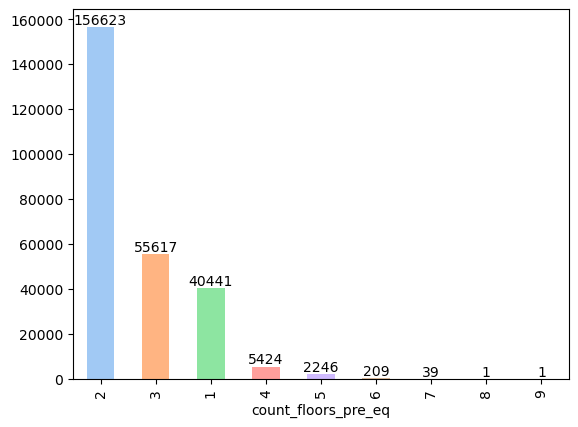

In [24]:
ax=dr_tr.count_floors_pre_eq.value_counts().plot(kind='bar',color=sns.color_palette('pastel'))
for i in ax.containers:
    ax.bar_label(i)

In [25]:
dr_tr.age.value_counts()

age
10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
160        6
170        6
175        5
135        5
190        3
145        3
195        2
165        2
155        1
185        1
Name: count, dtype: int64

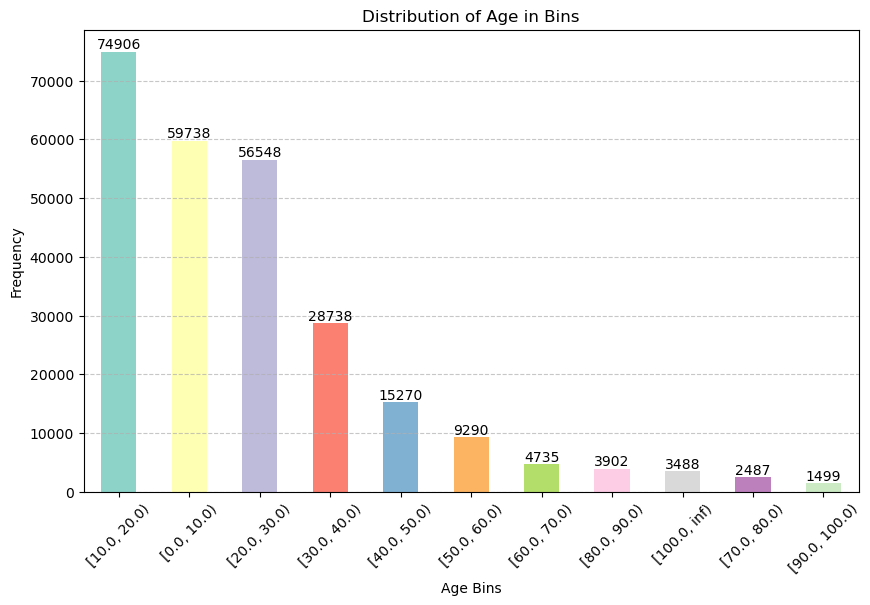

In [26]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
ax=pd.cut(dr_tr['age'], bins=bin_edges, right=False).value_counts().plot(kind='bar', color=sns.color_palette('Set3'),figsize=(10, 6),title='Distribution of Age in Bins',
                                                                        xlabel='Age Bins',ylabel='Frequency')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
dr_tr.area_percentage.value_counts()

area_percentage
6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
55         1
80         1
90         1
82         1
100        1
Name: count, Length: 84, dtype: int64

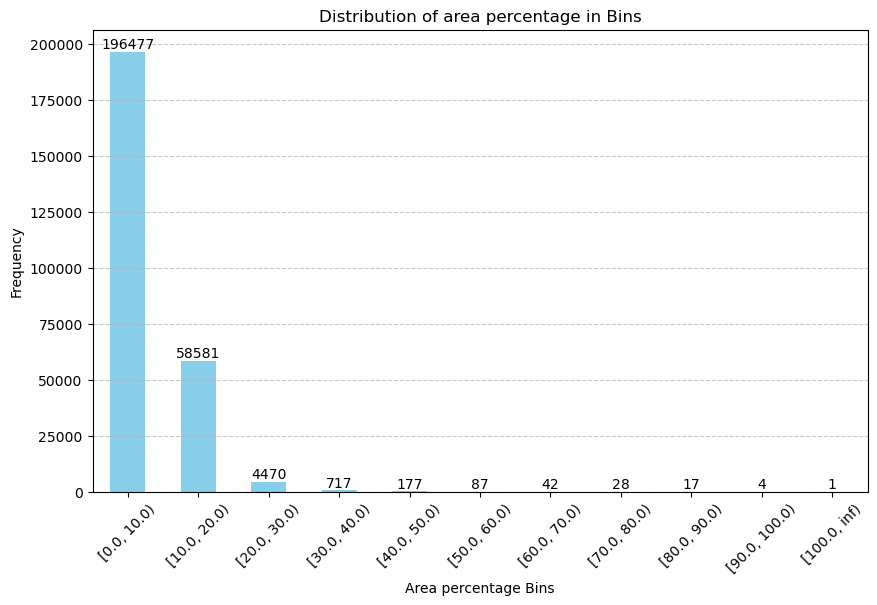

In [28]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
ax=pd.cut(dr_tr.area_percentage, bins=bin_edges, right=False).value_counts().plot(kind='bar', color='skyblue',figsize=(10, 6),title='Distribution of area percentage in Bins',
                                                                        xlabel='Area percentage Bins',ylabel='Frequency')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
dr_tr.height_percentage.value_counts()

height_percentage
5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: count, dtype: int64

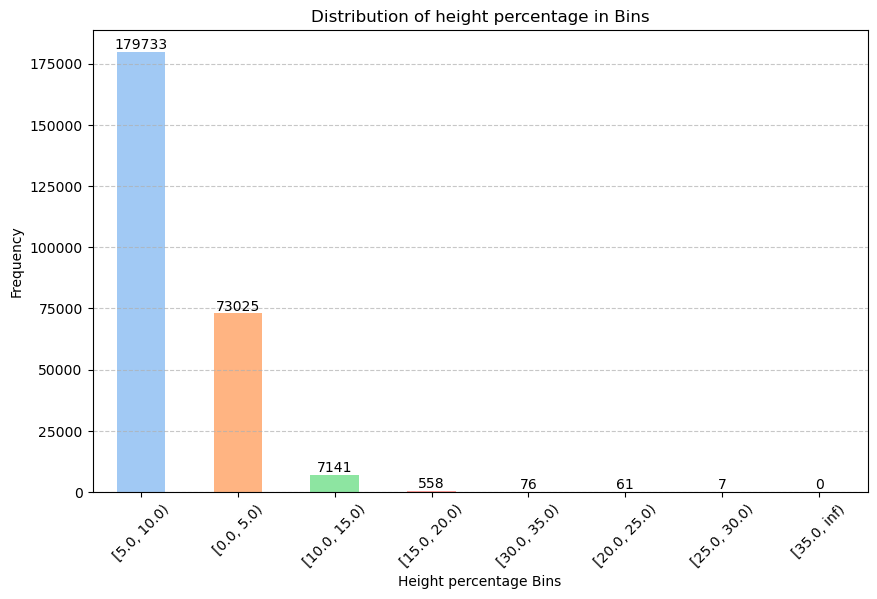

In [30]:
bin_edges = [0,5,10,15,20,25,30,35, float('inf')]
ax=pd.cut(dr_tr.height_percentage, bins=bin_edges, right=False).value_counts().plot(kind='bar', color=sns.color_palette('pastel'),figsize=(10, 6),title='Distribution of height percentage in Bins',
                                                                        xlabel='Height percentage Bins',ylabel='Frequency')
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
dr_tr.land_surface_condition.value_counts()

land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64

<Axes: ylabel='count'>

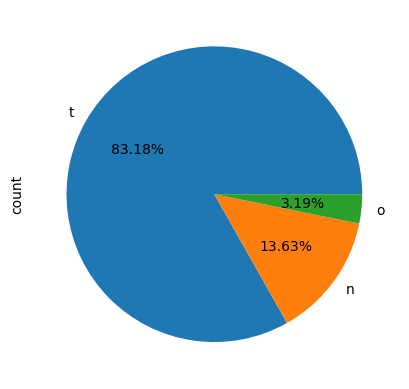

In [32]:
dr_tr.land_surface_condition.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [33]:
dr_tr.foundation_type.value_counts()

foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64

<Axes: ylabel='count'>

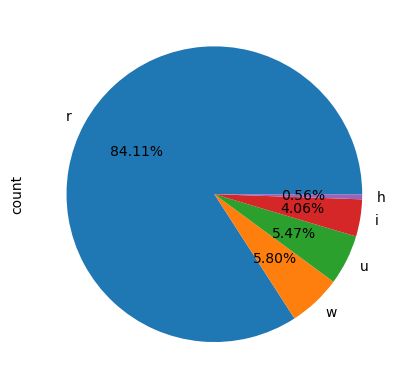

In [34]:
dr_tr.foundation_type.value_counts().plot(kind='pie',autopct='%0.2f%%')

In [35]:
dr_tr['roof_type'].value_counts()

roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Roof Types'}, ylabel='count'>

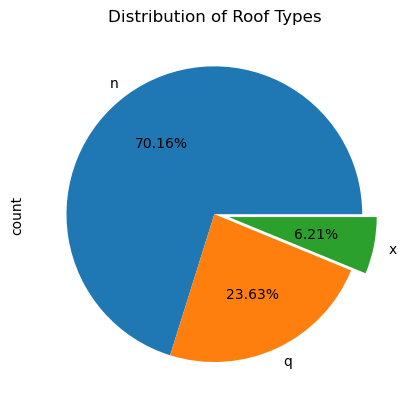

In [36]:
dr_tr['roof_type'].value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1],title='Distribution of Roof Types')

In [37]:
dr_tr.ground_floor_type.value_counts()

ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Ground Floor Types'}, ylabel='count'>

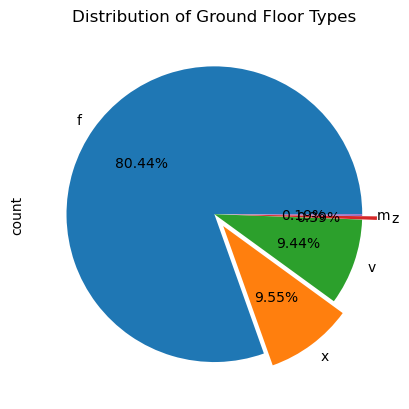

In [38]:
dr_tr.ground_floor_type.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1,0,0.1,0],title='Distribution of Ground Floor Types')

In [39]:
dr_tr.other_floor_type.value_counts()

other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Other Floor Types'}, ylabel='count'>

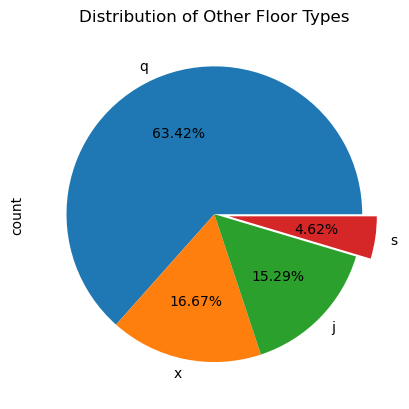

In [40]:
dr_tr.other_floor_type.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0,0.1],title='Distribution of Other Floor Types')

In [41]:
dr_tr['position'].value_counts()

position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Positions Types'}, ylabel='count'>

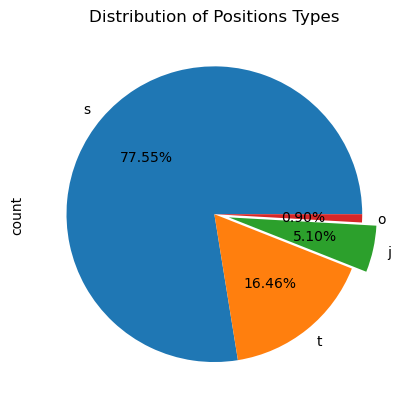

In [42]:
dr_tr.position.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0,0.1,0],title='Distribution of Positions Types')

In [43]:
dr_tr.plan_configuration.value_counts()

plan_configuration
d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: count, dtype: int64

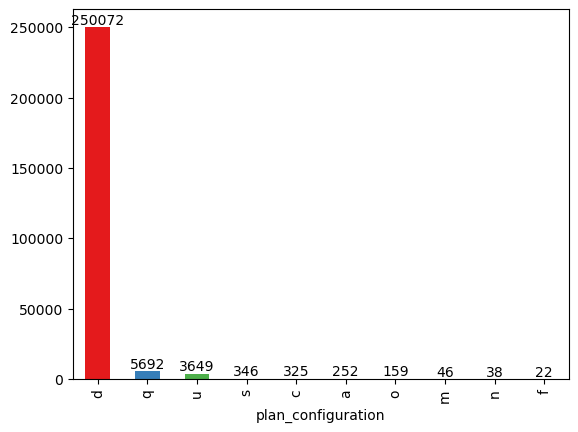

In [44]:
ax=dr_tr.plan_configuration.value_counts().plot(kind='bar',color=sns.color_palette('Set1'))
for i in ax.containers:
    ax.bar_label(i)

In [45]:
dr_tr['has_superstructure_adobe_mud'].value_counts()

has_superstructure_adobe_mud
0    237500
1     23101
Name: count, dtype: int64

<Axes: ylabel='count'>

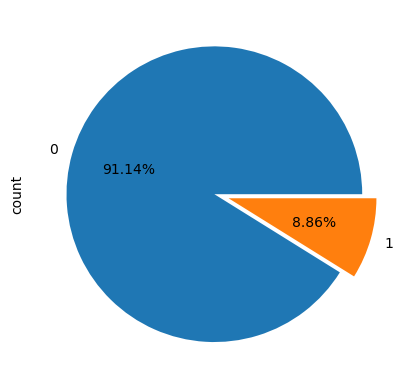

In [46]:
dr_tr.has_superstructure_adobe_mud.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [47]:
dr_tr.has_superstructure_mud_mortar_stone.value_counts()

has_superstructure_mud_mortar_stone
1    198561
0     62040
Name: count, dtype: int64

<Axes: ylabel='count'>

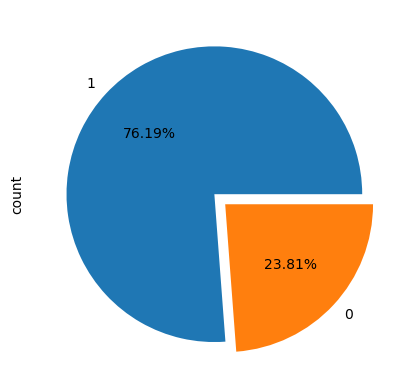

In [48]:
dr_tr.has_superstructure_mud_mortar_stone.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [49]:
dr_tr.has_superstructure_stone_flag.value_counts()

has_superstructure_stone_flag
0    251654
1      8947
Name: count, dtype: int64

<Axes: ylabel='count'>

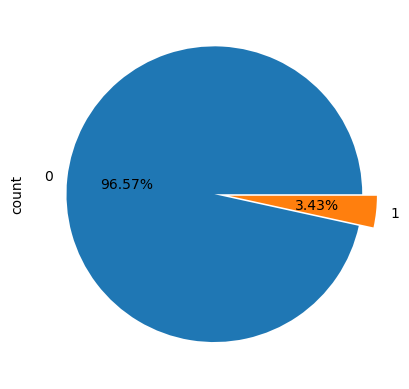

In [50]:
dr_tr.has_superstructure_stone_flag.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [51]:
dr_tr.has_superstructure_cement_mortar_stone.value_counts()

has_superstructure_cement_mortar_stone
0    255849
1      4752
Name: count, dtype: int64

<Axes: ylabel='count'>

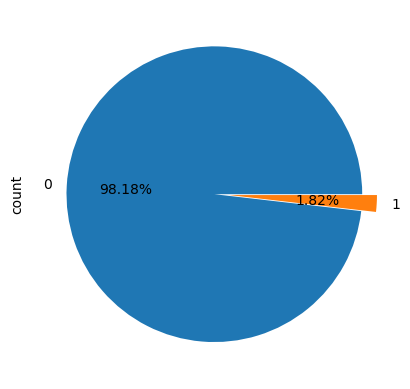

In [52]:
dr_tr.has_superstructure_cement_mortar_stone.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [53]:
dr_tr.has_superstructure_mud_mortar_brick.value_counts()

has_superstructure_mud_mortar_brick
0    242840
1     17761
Name: count, dtype: int64

<Axes: ylabel='count'>

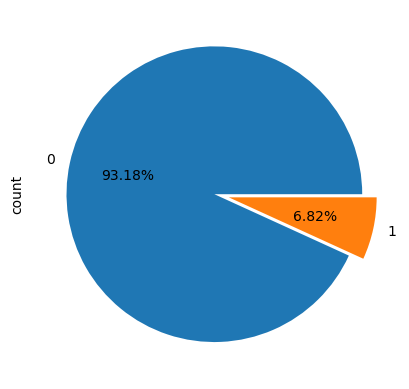

In [54]:
dr_tr.has_superstructure_mud_mortar_brick.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [55]:
dr_tr.has_superstructure_cement_mortar_brick.value_counts()

has_superstructure_cement_mortar_brick
0    240986
1     19615
Name: count, dtype: int64

<Axes: ylabel='count'>

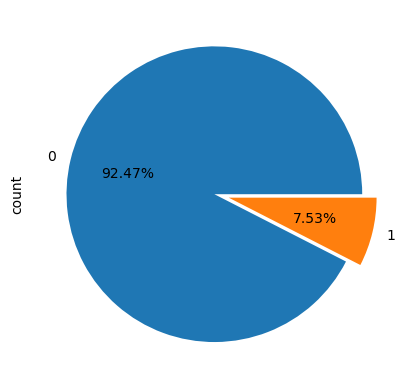

In [56]:
dr_tr.has_superstructure_cement_mortar_brick.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [57]:
dr_tr.has_superstructure_timber.value_counts()

has_superstructure_timber
0    194151
1     66450
Name: count, dtype: int64

<Axes: ylabel='count'>

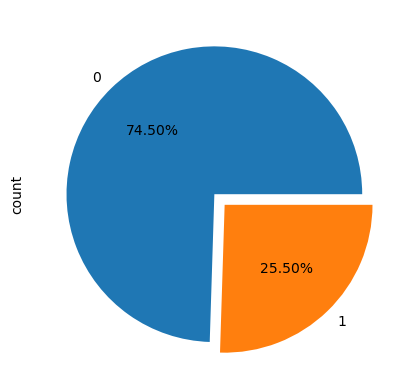

In [58]:
dr_tr.has_superstructure_timber.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [59]:
dr_tr.has_superstructure_bamboo.value_counts()

has_superstructure_bamboo
0    238447
1     22154
Name: count, dtype: int64

<Axes: ylabel='count'>

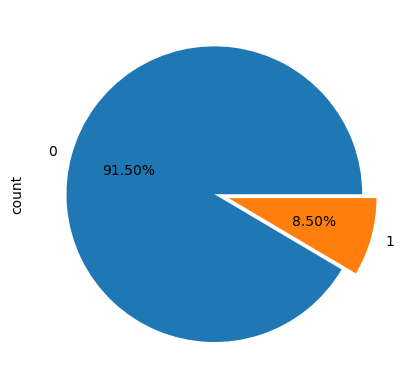

In [60]:
dr_tr.has_superstructure_bamboo.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [61]:
dr_tr.has_superstructure_rc_non_engineered.value_counts()

has_superstructure_rc_non_engineered
0    249502
1     11099
Name: count, dtype: int64

<Axes: ylabel='count'>

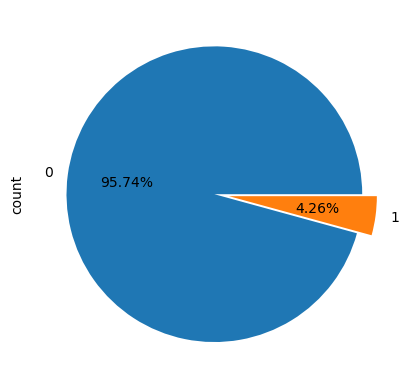

In [62]:
dr_tr.has_superstructure_rc_non_engineered.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [63]:
dr_tr.has_superstructure_rc_engineered.value_counts()

has_superstructure_rc_engineered
0    256468
1      4133
Name: count, dtype: int64

<Axes: ylabel='count'>

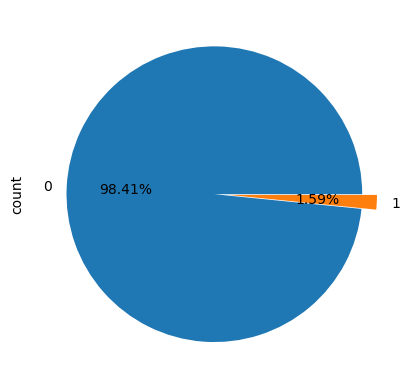

In [64]:
dr_tr.has_superstructure_rc_engineered.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [65]:
dr_tr.has_superstructure_other.value_counts()

has_superstructure_other
0    256696
1      3905
Name: count, dtype: int64

<Axes: ylabel='count'>

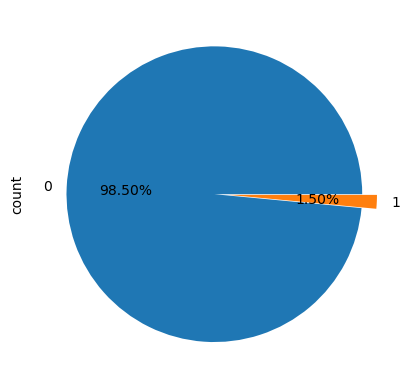

In [66]:
dr_tr.has_superstructure_other.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [67]:
dr_tr.legal_ownership_status.value_counts()

legal_ownership_status
v    250939
a      5512
w      2677
r      1473
Name: count, dtype: int64

<Axes: xlabel='legal_ownership_status'>

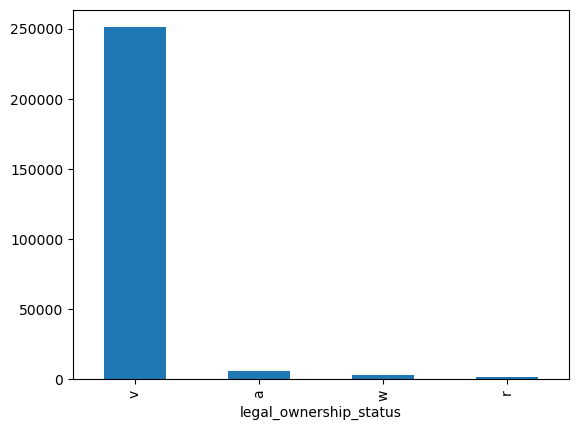

In [68]:
dr_tr.legal_ownership_status.value_counts().plot(kind='bar')

In [69]:
dr_tr.count_families.value_counts()

count_families
1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count, dtype: int64

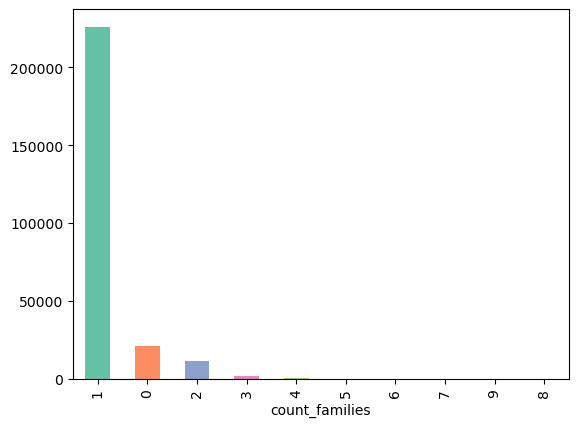

In [70]:
ax=dr_tr.count_families.value_counts().plot(kind='bar',color=sns.color_palette('Set2'))

In [71]:
dr_tr.has_secondary_use.value_counts()

has_secondary_use
0    231445
1     29156
Name: count, dtype: int64

<Axes: ylabel='count'>

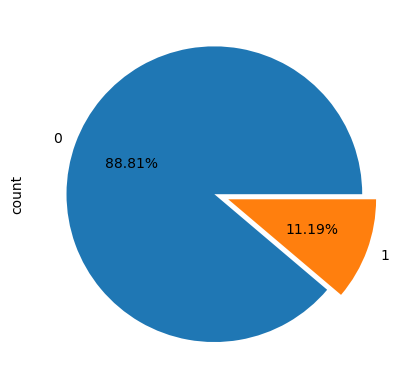

In [72]:
dr_tr.has_secondary_use.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [73]:
dr_tr.has_secondary_use_agriculture.value_counts()

has_secondary_use_agriculture
0    243824
1     16777
Name: count, dtype: int64

<Axes: ylabel='count'>

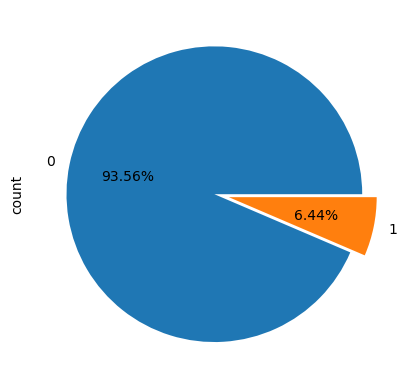

In [74]:
dr_tr.has_secondary_use_agriculture.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [75]:
dr_tr.has_secondary_use_hotel.value_counts()

has_secondary_use_hotel
0    251838
1      8763
Name: count, dtype: int64

<Axes: ylabel='count'>

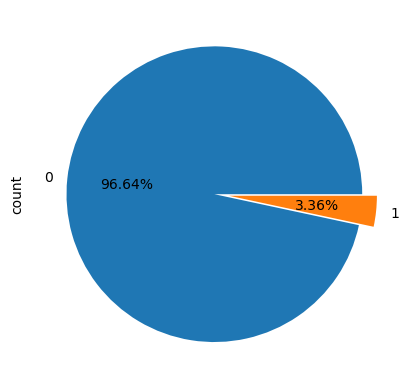

In [76]:
dr_tr.has_secondary_use_hotel.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [77]:
dr_tr.has_secondary_use_rental.value_counts()

has_secondary_use_rental
0    258490
1      2111
Name: count, dtype: int64

<Axes: ylabel='count'>

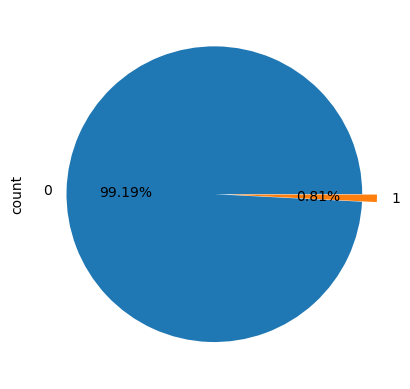

In [78]:
dr_tr.has_secondary_use_rental.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [79]:
dr_tr.has_secondary_use_institution.value_counts()

has_secondary_use_institution
0    260356
1       245
Name: count, dtype: int64

<Axes: ylabel='count'>

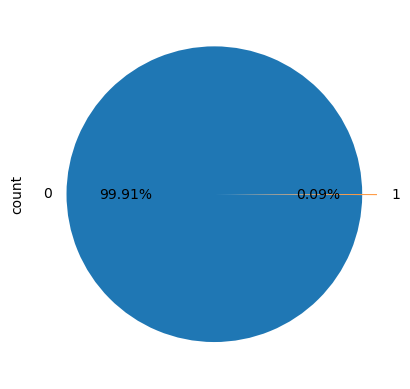

In [80]:
dr_tr.has_secondary_use_institution.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [81]:
dr_tr.has_secondary_use_school.value_counts()

has_secondary_use_school
0    260507
1        94
Name: count, dtype: int64

<Axes: ylabel='count'>

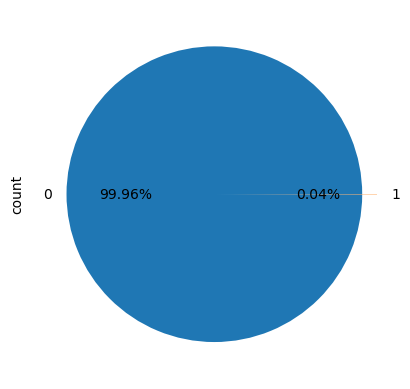

In [82]:
dr_tr.has_secondary_use_school.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [83]:
dr_tr.has_secondary_use_industry.value_counts()

has_secondary_use_industry
0    260322
1       279
Name: count, dtype: int64

<Axes: ylabel='count'>

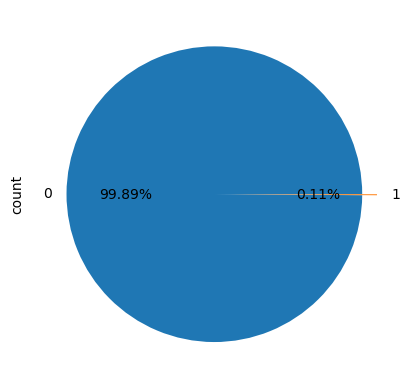

In [84]:
dr_tr.has_secondary_use_industry.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [85]:
dr_tr.has_secondary_use_health_post.value_counts()

has_secondary_use_health_post
0    260552
1        49
Name: count, dtype: int64

<Axes: ylabel='count'>

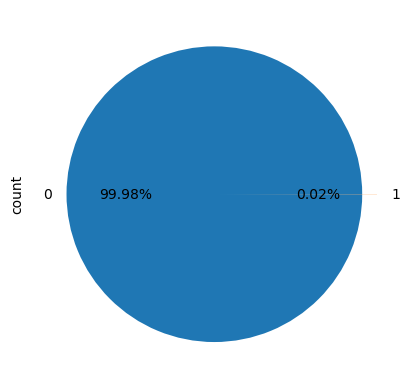

In [86]:
dr_tr.has_secondary_use_health_post.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [87]:
dr_tr.has_secondary_use_gov_office.value_counts()

has_secondary_use_gov_office
0    260563
1        38
Name: count, dtype: int64

<Axes: ylabel='count'>

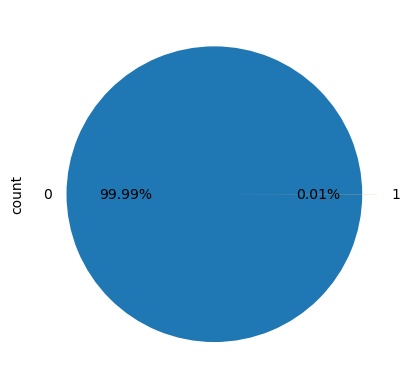

In [88]:
dr_tr.has_secondary_use_gov_office.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [89]:
dr_tr.has_secondary_use_use_police.value_counts()

has_secondary_use_use_police
0    260578
1        23
Name: count, dtype: int64

<Axes: ylabel='count'>

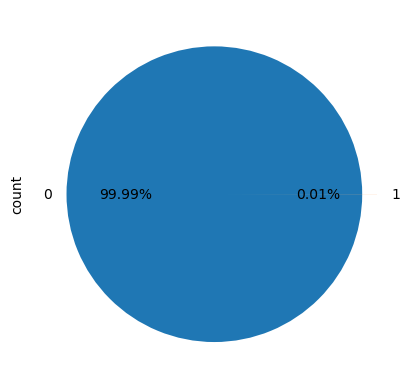

In [90]:
dr_tr.has_secondary_use_use_police.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [91]:
dr_tr.has_secondary_use_other.value_counts()

has_secondary_use_other
0    259267
1      1334
Name: count, dtype: int64

<Axes: ylabel='count'>

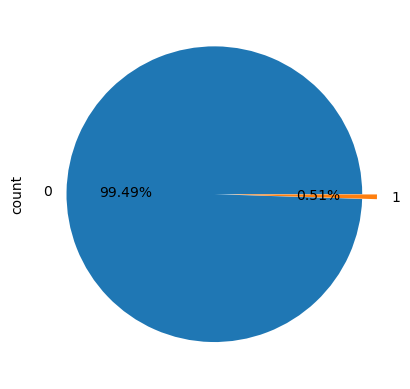

In [92]:
dr_tr.has_secondary_use_other.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0,0.1])

In [93]:
dr_tr.damage_grade.value_counts()

damage_grade
2    148259
3     87218
1     25124
Name: count, dtype: int64

<Axes: ylabel='count'>

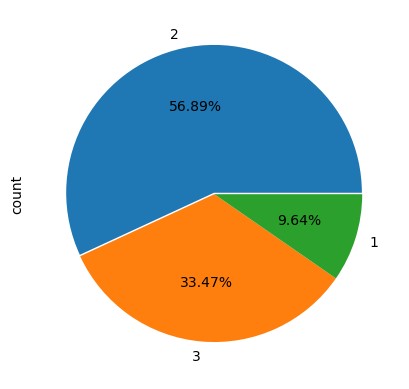

In [94]:
dr_tr.damage_grade.value_counts().plot(kind='pie',autopct='%0.2f%%',explode=[0.01,0,0])

# Converting datatype from int to object

In [95]:
dr_tr.dtypes

count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_timber                  int64
has_superstructure_bamboo                  int64
has_superstructure_rc_non_engineered       int64
has_superstructure_r

In [96]:
dr_tr.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_off

In [97]:
int_columns = ['count_floors_pre_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
        'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other','damage_grade']

In [98]:
dr_tr[int_columns] = dr_tr[int_columns].astype('object')

In [99]:
print(dr_tr.dtypes)

count_floors_pre_eq                       object
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud              object
has_superstructure_mud_mortar_stone       object
has_superstructure_stone_flag             object
has_superstructure_cement_mortar_stone    object
has_superstructure_mud_mortar_brick       object
has_superstructure_cement_mortar_brick    object
has_superstructure_timber                 object
has_superstructure_bamboo                 object
has_superstructure_rc_non_engineered      object
has_superstructure_r

# Converting datatype from int to object

In [100]:
dr_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   count_floors_pre_eq                     86868 non-null  int64 
 1   age                                     86868 non-null  int64 
 2   area_percentage                         86868 non-null  int64 
 3   height_percentage                       86868 non-null  int64 
 4   land_surface_condition                  86868 non-null  object
 5   foundation_type                         86868 non-null  object
 6   roof_type                               86868 non-null  object
 7   ground_floor_type                       86868 non-null  object
 8   other_floor_type                        86868 non-null  object
 9   position                                86868 non-null  object
 10  plan_configuration                      86868 non-null  object
 11  ha

In [101]:
dr_tt.columns

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_off

In [102]:
int_columns_tt = ['count_floors_pre_eq','has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
        'has_superstructure_timber','has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel','has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry','has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [103]:
dr_tt[int_columns_tt] = dr_tt[int_columns_tt].astype('object')

In [104]:
dr_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86868 entries, 0 to 86867
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   count_floors_pre_eq                     86868 non-null  object
 1   age                                     86868 non-null  int64 
 2   area_percentage                         86868 non-null  int64 
 3   height_percentage                       86868 non-null  int64 
 4   land_surface_condition                  86868 non-null  object
 5   foundation_type                         86868 non-null  object
 6   roof_type                               86868 non-null  object
 7   ground_floor_type                       86868 non-null  object
 8   other_floor_type                        86868 non-null  object
 9   position                                86868 non-null  object
 10  plan_configuration                      86868 non-null  object
 11  ha

# Splitting into numcols and objcols

In [105]:
numcols=dr_tr.select_dtypes(include=np.number)
objcols=dr_tr.select_dtypes(include='object')

In [106]:
numcols.head()

,age,area_percentage,height_percentage
0,30,6,5
1,10,8,7
2,10,5,5
3,10,6,5
4,30,8,9


In [107]:
objcols.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,2,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,2,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,2,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,2,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,3,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [108]:
numcols.corr()

,age,area_percentage,height_percentage
age,1.000000,-0.004323,0.061074
area_percentage,-0.004323,1.000000,0.196645
height_percentage,0.061074,0.196645,1.000000


In [109]:
np.round(numcols.corr(),2)

,age,area_percentage,height_percentage
age,1.00,-0.0,0.06
area_percentage,-0.00,1.0,0.20
height_percentage,0.06,0.2,1.00


<Axes: >

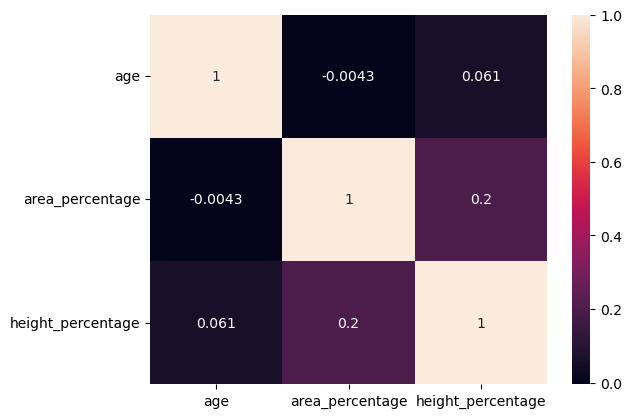

In [110]:
sns.heatmap(numcols.corr(),annot=True)

<Axes: >

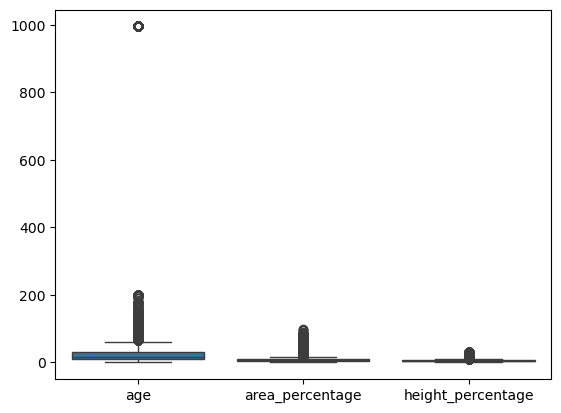

In [111]:
sns.boxplot(numcols)

In [112]:
numcols.describe()

,age,area_percentage,height_percentage
count,260601.000000,260601.000000,260601.000000
mean,26.535029,8.018051,5.434365
std,73.565937,4.392231,1.918418
min,0.000000,1.000000,2.000000
25%,10.000000,5.000000,4.000000
50%,15.000000,7.000000,5.000000
75%,30.000000,9.000000,6.000000
max,995.000000,100.000000,32.000000


# Scaling the numeric columns

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
sc=StandardScaler()

In [115]:
numcols_sc=sc.fit_transform(numcols)

In [116]:
numcols_scaled=pd.DataFrame(numcols_sc,columns=numcols.columns)

In [117]:
numcols_scaled.head()

,age,area_percentage,height_percentage
0,0.047100,-0.459460,-0.226419
1,-0.224765,-0.004110,0.816109
2,-0.224765,-0.687135,-0.226419
3,-0.224765,-0.459460,-0.226419
4,0.047100,-0.004110,1.858636


<Axes: >

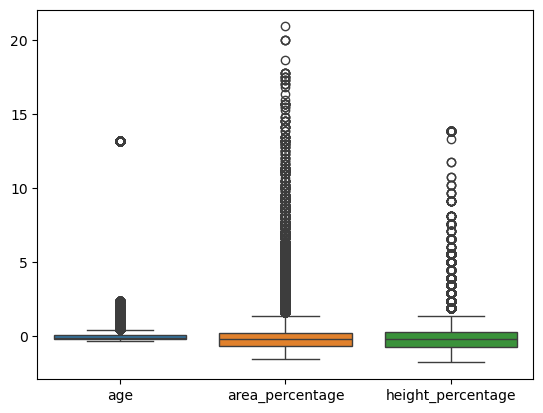

In [118]:
sns.boxplot(numcols_scaled)

# Minmax Scaler

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
mm=MinMaxScaler()

In [121]:
numcols_mm=mm.fit_transform(numcols)

In [122]:
numcols_mm=pd.DataFrame(numcols_mm,columns=numcols.columns)

In [123]:
numcols_mm.head()

,age,area_percentage,height_percentage
0,0.030151,0.050505,0.100000
1,0.010050,0.070707,0.166667
2,0.010050,0.040404,0.100000
3,0.010050,0.050505,0.100000
4,0.030151,0.070707,0.233333


<Axes: >

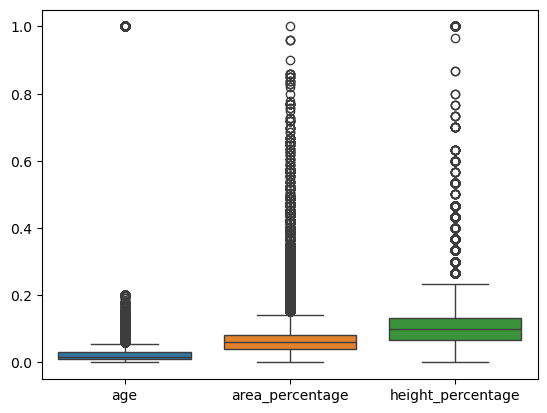

In [124]:
sns.boxplot(numcols_mm)

# Robust scaler

In [125]:
from sklearn.preprocessing import RobustScaler

In [126]:
robust=RobustScaler()

In [127]:
numcols_robust=robust.fit_transform(numcols)

In [128]:
numcols_robust=pd.DataFrame(numcols_robust,columns=numcols.columns)

In [129]:
numcols_robust.head()

,age,area_percentage,height_percentage
0,0.75,-0.25,0.0
1,-0.25,0.25,1.0
2,-0.25,-0.50,0.0
3,-0.25,-0.25,0.0
4,0.75,0.25,2.0


<Axes: >

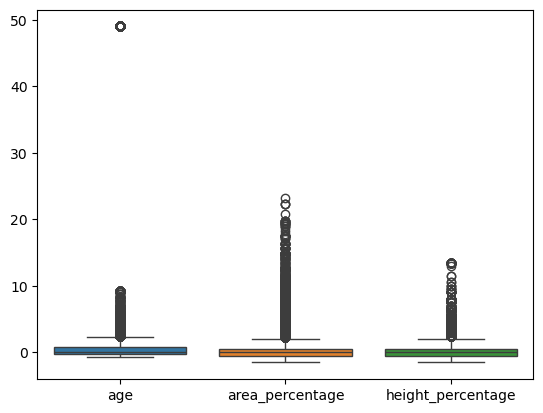

In [130]:
sns.boxplot(numcols_robust)

# converting object data into numerical(Label Encoding) 

In [131]:
from sklearn.preprocessing import LabelEncoder

In [132]:
lb=LabelEncoder()

In [133]:
objcols=objcols.apply(LabelEncoder().fit_transform)

In [134]:
objcols.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
1,1,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
3,1,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
4,2,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2


### test objcols label encoding

In [135]:
numcols_tt=dr_tt.select_dtypes(include=np.number)
objcols_tt=dr_tt.select_dtypes(include='object')

In [136]:
numcols_tt.head()

,age,area_percentage,height_percentage
0,20,7,6
1,25,13,5
2,5,4,5
3,0,19,3
4,15,8,7


In [137]:
objcols_tt.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,3,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
2,2,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,1,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0
4,3,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [138]:
objcols_tt=objcols_tt.apply(LabelEncoder().fit_transform)

In [139]:
objcols_tt.head()

,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,2,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0
2,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,2,2,2,2,0,3,2,0,0,0,0,0,1,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,0
4,2,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


# Combining the dataframe numcols and objcols

In [140]:
combinedf=pd.concat([numcols,objcols],axis=1)

In [141]:
combinedf.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,30,6,5,1,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
1,10,8,7,1,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
2,10,5,5,1,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2
3,10,6,5,1,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1
4,30,8,9,2,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,2


In [142]:
dr_tt=pd.concat([numcols_tt,objcols_tt],axis=1)

In [143]:
dr_tt.head()

,age,area_percentage,height_percentage,count_floors_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,20,7,6,2,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,25,13,5,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0
2,5,4,5,1,2,2,0,0,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,0,19,3,0,2,2,2,2,0,3,2,0,0,0,0,0,1,0,0,0,0,0,2,2,1,0,0,1,0,0,0,0,0,0,0
4,15,8,7,2,2,2,1,0,1,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


# Splitting into Dependent(y) and Independent variables(X's)

In [144]:
X=combinedf.drop('damage_grade',axis=1)
y=combinedf.damage_grade

<Axes: xlabel='damage_grade'>

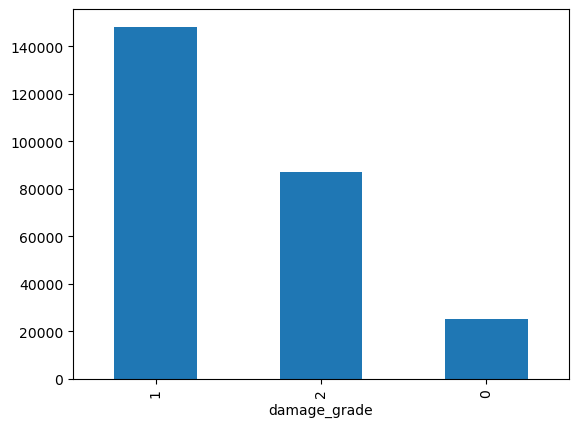

In [145]:
y.value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Density'>

<Figure size 3000x1500 with 0 Axes>

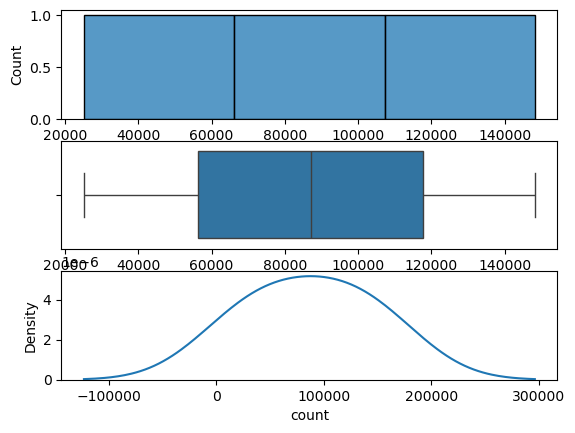

In [146]:
#histogram,boxplot,density curve of y
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(y.value_counts(),ax=ax[0])
sns.boxplot(y.value_counts(),orient='h',ax=ax[1])
sns.kdeplot(y.value_counts(),ax=ax[2])

# Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
reg=LogisticRegression(max_iter=1500)#class_weight='balanced',multi_class='multinomial'

In [149]:
regmodel=reg.fit(X,y)

In [150]:
regmodel.score(X,y)

0.579145897368007

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [152]:
cross_val_score(reg,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([0.57832735, 0.57709133, 0.58008442, 0.58094781, 0.57837682])

In [153]:
np.mean([0.57832735, 0.57709133, 0.58008442, 0.58094781, 0.57837682])

0.5789655459999999

In [154]:
y_pred=reg.predict(X)

In [155]:
pd.crosstab(y,y_pred)

col_0,0,1,2
damage_grade,,,
0,6181,18772,171
1,4340,139091,4828
2,334,81230,5654


In [156]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.25      0.34     25124
           1       0.58      0.94      0.72    148259
           2       0.53      0.06      0.12     87218

    accuracy                           0.58    260601
   macro avg       0.56      0.42      0.39    260601
weighted avg       0.56      0.58      0.48    260601



when we see the classification report that imbalance data is effectiing more in recall and f1-score. So we need to balance the data by using oversampling method.

# Converting Imbalance data to Balance Data

In [147]:
from imblearn.over_sampling import SMOTE

In [148]:
sm=SMOTE(random_state=42)

In [149]:
X_smote,y_smote=sm.fit_resample(X,y)

In [160]:
pd.DataFrame(y_smote).value_counts()

damage_grade
0               148259
1               148259
2               148259
Name: count, dtype: int64

In [161]:
y.value_counts()

damage_grade
1    148259
2     87218
0     25124
Name: count, dtype: int64

# Logistic Regression using smote

In [162]:
reg_smote=LogisticRegression(max_iter=3000,multi_class='multinomial')

In [163]:
regmodel_smote=reg_smote.fit(X_smote,y_smote)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
regmodel_smote.score(X_smote,y_smote)

0.5823457597852407

In [165]:
cross_val_score(reg_smote,X_smote,y_smote)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([0.54334727, 0.57724043, 0.57837109, 0.59046709, 0.5958968 ])

In [166]:
np.mean([0.54334727, 0.57724043, 0.57837109, 0.59046709, 0.5958968 ])

0.5770645360000002

In [167]:
regmodel_X_sm=regmodel_smote.predict(X_smote)

In [168]:
pd.crosstab(y_smote,regmodel_X_sm)

col_0,0,1,2
damage_grade,,,
0,99900,14198,34161
1,17837,49713,80709
2,7935,30923,109401


In [169]:
print(classification_report(y_smote,regmodel_X_sm))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73    148259
           1       0.52      0.34      0.41    148259
           2       0.49      0.74      0.59    148259

    accuracy                           0.58    444777
   macro avg       0.60      0.58      0.58    444777
weighted avg       0.60      0.58      0.58    444777



In [170]:
regpredict_test_sm=regmodel_smote.predict(dr_tt)

In [171]:
regpredict_tt_sm=pd.DataFrame(regpredict_test_sm)

In [172]:
regpredict_tt_sm.value_counts()

2    49720
1    25452
0    11696
Name: count, dtype: int64

In [173]:
regpredict_tt_sm=regpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [174]:
regpredict_tt_sm.value_counts()

High Damage      49720
Medium Damage    25452
Low Damage       11696
Name: count, dtype: int64

# Decission Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
tree_smote=DecisionTreeClassifier(max_depth=45)

In [177]:
treemodel_sm=tree_smote.fit(X_smote,y_smote)

In [178]:
treemodel_sm.score(X_smote,y_smote)

0.8172387511044861

In [179]:
cross_val_score(tree_smote,X_smote,y_smote)

array([0.58911147, 0.64699402, 0.64621438, 0.68046765, 0.68159182])

In [180]:
np.mean([0.58862809, 0.64757858, 0.64657411, 0.68099601, 0.68183913])

0.6491231839999999

In [181]:
tree_X_sm=treemodel_sm.predict(X_smote)

In [182]:
pd.crosstab(y_smote,tree_X_sm)

col_0,0,1,2
damage_grade,,,
0,133270,5798,9191
1,11832,109050,27377
2,8577,18513,121169


In [183]:
print(classification_report(y_smote,tree_X_sm))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88    148259
           1       0.82      0.74      0.77    148259
           2       0.77      0.82      0.79    148259

    accuracy                           0.82    444777
   macro avg       0.82      0.82      0.82    444777
weighted avg       0.82      0.82      0.82    444777



In [184]:
treepredict_test_sm=treemodel_sm.predict(dr_tt)

In [185]:
treepredict_tt_sm=pd.DataFrame(treepredict_test_sm)

In [186]:
treepredict_tt_sm.value_counts()

1    38446
2    34172
0    14250
Name: count, dtype: int64

In [187]:
treepredict_tt_sm=treepredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [188]:
treepredict_tt_sm.value_counts()

Medium Damage    38446
High Damage      34172
Low Damage       14250
Name: count, dtype: int64

# Random Forest with smote

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf_smote=RandomForestClassifier(max_depth=40,n_estimators=100)

In [191]:
rfmodel_smote=rf_smote.fit(X_smote,y_smote)

In [192]:
rfmodel_smote.score(X_smote,y_smote)

0.815757109742635

In [193]:
cross_val_score(rf_smote,X_smote,y_smote)

array([0.61333693, 0.66707136, 0.66949581, 0.70154573, 0.70441234])

In [194]:
np.mean([0.61431494, 0.66699267, 0.66945085, 0.70187173, 0.7036704 ])

0.671260118

In [195]:
rfpredict_X_smote=rfmodel_smote.predict(X_smote)

In [196]:
pd.crosstab(y_smote,rfpredict_X_smote)

col_0,0,1,2
damage_grade,,,
0,130436,7015,10808
1,9732,106259,32268
2,6830,15294,126135


In [197]:
print(classification_report(y_smote,rfpredict_X_smote))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88    148259
           1       0.83      0.72      0.77    148259
           2       0.75      0.85      0.79    148259

    accuracy                           0.82    444777
   macro avg       0.82      0.82      0.82    444777
weighted avg       0.82      0.82      0.82    444777



In [198]:
rfpredict_test_sm=rfmodel_smote.predict(dr_tt)

In [199]:
rfpredict_tt_sm=pd.DataFrame(rfpredict_test_sm)

In [200]:
rfpredict_tt_sm.value_counts()

1    38900
2    35309
0    12659
Name: count, dtype: int64

In [201]:
rfpredict_tt_sm=rfpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [202]:
rfpredict_tt_sm.value_counts()

Medium Damage    38900
High Damage      35309
Low Damage       12659
Name: count, dtype: int64

# GBM with smote

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

In [204]:
gbc_smote=GradientBoostingClassifier(max_depth=20)

In [205]:
gbcmodel_smote=gbc_smote.fit(X_smote,y_smote)

In [206]:
gbc_smote.score(X_smote,y_smote)

0.815898753757501

In [207]:
cross_val_score(gbc_smote,X_smote,y_smote)


KeyboardInterrupt



In [208]:
np.mean([0.58720041, 0.63982193, 0.64157158, 0.65413973, 0.65687145]) #10

0.6359210200000001

In [209]:
gbc_X_smote=gbc_smote.predict(X_smote)

In [210]:
pd.crosstab(y_smote,gbc_X_smote)

col_0,0,1,2
damage_grade,,,
0,131345,7065,9849
1,10213,106783,31263
2,7363,16131,124765


In [211]:
print(classification_report(y_smote,gbc_X_smote))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88    148259
           1       0.82      0.72      0.77    148259
           2       0.75      0.84      0.79    148259

    accuracy                           0.82    444777
   macro avg       0.82      0.82      0.82    444777
weighted avg       0.82      0.82      0.82    444777



In [212]:
gbc_test_sm=gbcmodel_smote.predict(dr_tt)

In [213]:
gbcpredict_tt_sm=pd.DataFrame(gbc_test_sm)

In [214]:
gbcpredict_tt_sm.value_counts()

1    39837
2    34544
0    12487
Name: count, dtype: int64

In [215]:
gbcpredict_tt_sm=gbcpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [216]:
gbcpredict_tt_sm.value_counts()

Medium Damage    39837
High Damage      34544
Low Damage       12487
Name: count, dtype: int64

# SVC with smote

In [150]:
from sklearn.svm import SVC

In [151]:
svc_sm=SVC()

In [152]:
svcmodel_smote=svc_sm.fit(X_smote,y_smote)

In [ ]:
svcmodel_smote.score(X_smote,y_smote)

In [ ]:
cross_val_score(svc_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
svc_X_smote=svc_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,svc_X_smote)

In [ ]:
print(classification_report(y_smote,svc_X_smote))

In [ ]:
svc_test_sm=svcmodel_smote.predict(dr_tt)

In [ ]:
svcpredict_tt_sm=pd.DataFrame(svc_test_sm)

In [ ]:
svcpredict_tt_sm.value_counts()

In [ ]:
svcredict_tt_sm=svcpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
svcpredict_tt_sm.value_counts()

# KNN with smote

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc_sm=KNeighborsClassifier()

In [ ]:
kncmodel_sm=knc_sm.fit(X_smote,y_smote)

In [ ]:
kncmodel_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(knc_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
knc_X_sm=knc_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,knc_X_sm)

In [ ]:
print(classification_report(y_smote,knc_X_sm))

In [ ]:
knc_test_sm=kncmodel_smote.predict(dr_tt)

In [ ]:
kncpredict_tt_sm=pd.DataFrame(knc_test_sm)

In [ ]:
svcpredict_tt_sm.value_counts()

In [ ]:
svcredict_tt_sm=svcpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
svcpredict_tt_sm.value_counts()

# Naive bayes with smote

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb_sm=GaussianNB()

In [ ]:
gbmodel_sm=gb_sm.fit(X_smote,y_smote)

In [ ]:
gbmodel_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(gb_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
gb_X_sm=gb_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,gb_X_sm)

In [ ]:
print(classification_report(y_smote,gb_X_sm))

In [ ]:
gb_test_sm=gbcmodel_smote.predict(dr_tt)

In [ ]:
gbpredict_tt_sm=pd.DataFrame(gb_test_sm)

In [ ]:
gbpredict_tt_sm.value_counts()

In [ ]:
gbredict_tt_sm=gbpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
gbpredict_tt_sm.value_counts()

# MultinomialNB with smote

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mb_sm=MultinomialNB()

In [ ]:
mbmodel_sm=mb_sm.fit(X_smote,y_smote)

In [ ]:
mbmodel_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(mb_sm,X_smote,y_smote)

In [ ]:
mb_X_sm=mb_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,mb_X_sm)

In [ ]:
print(classification_report(y_smote,mb_X_sm))

In [ ]:
mb_test_sm=mbmodel_smote.predict(dr_tt)

In [ ]:
mbpredict_tt_sm=pd.DataFrame(mb_test_sm)

In [ ]:
mbpredict_tt_sm.value_counts()

In [ ]:
mbredict_tt_sm=mbpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
mbpredict_tt_sm.value_counts()

# BernouliNB with smote

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb_sm=BernoulliNB()

In [ ]:
bnbmodel_sm=bnb_sm.fit(X_smote,y_smote)

In [ ]:
bnbmodel_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(bnb_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
bnb_X_sm=bnb_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,bnb_X_sm)

In [ ]:
print(classification_report(y_smote,bnb_X_sm))

In [ ]:
bnb_test_sm=bnbmodel_smote.predict(dr_tt)

In [ ]:
bnbpredict_tt_sm=pd.DataFrame(bnb_test_sm)

In [ ]:
bnbpredict_tt_sm.value_counts()

In [ ]:
bnbpredict_tt_sm=bnbpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
bnbpredict_tt_sm.value_counts()

# CategoricalNB with smote

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
cat=CategoricalNB(alpha=10)

In [ ]:
catmodel=cat.fit(X_smote,y_smote)

In [ ]:
catmodel.score(X_smote,y_smote)

In [ ]:
cross_val_score(cat,X_smote,y_smote)

In [ ]:
catpredict=cat.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,catpredict)

In [ ]:
print(classification_report(y_smote,catpredict))

In [ ]:
cat_test_sm=catmodel.predict(dr_tt)

In [ ]:
catpredict_tt_sm=pd.DataFrame(cat_test_sm)

In [ ]:
catpredict_tt_sm.value_counts()

In [ ]:
catpredict_tt_sm=catpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
catpredict_tt_sm.value_counts()

# LinearSVC with smote

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
ls_sm=LinearSVC(C=8)

In [ ]:
lsmodel_sm=ls_sm.fit(X_smote,y_smote)

In [ ]:
lsmodel_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(ls_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
lspredict_X=ls_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,lspredict_X)

In [ ]:
print(classification_report(y_smote,lspredict_X))

In [ ]:
ls_test_sm=lsmodel_sm.predict(dr_tt)

In [ ]:
lspredict_tt_sm=pd.DataFrame(ls_test_sm)

In [ ]:
lspredict_tt_sm.value_counts()

In [ ]:
lspredict_tt_sm=lspredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
lspredict_tt_sm.value_counts()

# Xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc_sm=XGBClassifier()

In [ ]:
xgbc_model_sm=xgbc.fit(X_smote,y_smote)

In [ ]:
xgbc_model_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(xgbc_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
xgbcpredict_X=xgbc_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,xgbcpredict_X)

In [ ]:
print(classification_report(y_smote,xgbcpredict_X))

In [ ]:
xgbc_test_sm=xgbc_model_sm.predict(dr_tt)

In [ ]:
xgbcpredict_tt_sm=pd.DataFrame(xgbc_test_sm)

In [ ]:
xgbcpredict_tt_sm.value_counts()

In [ ]:
xgbcpredict_tt_sm=xgbcpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
xgbcpredict_tt_sm.value_counts()

# lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbc_sm=LGBMClassifier()

In [ ]:
lgbc_model_sm=lgbc_sm.fit(X_smote,y_smote)

In [ ]:
lgbc_model_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(lgbc_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
lgbcpredict_X=lgbc_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,lgbcpredict_X)

In [ ]:
print(classification_report(y_smote,lgbcpredict_X))

In [ ]:
lgbc_test_sm=lgbc_model_sm.predict(dr_tt)

In [ ]:
lgbcpredict_tt_sm=pd.DataFrame(lgbc_test_sm)

In [ ]:
lgbcpredict_tt_sm.value_counts()

In [ ]:
lgbcpredict_tt_sm=lgbcpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
lgbcpredict_tt_sm.value_counts()

# catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catb_sm=CatBoostClassifier()

In [ ]:
catb_model_sm=catb_sm.fit(X_smote,y_smote)

In [ ]:
catb_model_sm.score(X_smote,y_smote)

In [ ]:
cross_val_score(catb_sm,X_smote,y_smote)

In [ ]:
np.mean

In [ ]:
catbpredict_X=catb_sm.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,catbpredict_X)

In [ ]:
print(classification_report(y_smote,catbpredict_X))

In [ ]:
catb_test_sm=catb_model_sm.predict(dr_tt)

In [ ]:
catbpredict_tt_sm=pd.DataFrame(catb_test_sm)

In [ ]:
catbpredict_tt_sm.value_counts()

In [ ]:
catbpredict_tt_sm=catbpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
catbpredict_tt_sm.value_counts()

# Adaboost

In [ ]:
from adodbapi

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300)

In [ ]:
clfmodel=clf.fit(X_smote,y_smote)

In [ ]:
clfmodel.score(X_smote,y_smote)

In [ ]:
cross_val_score(clf,X_smote,y_ssmote)

In [ ]:
np.mean

In [ ]:
clfpredict_X=clf.predict(X_smote)

In [ ]:
pd.crosstab(y_smote,clfbpredict_X)

In [ ]:
print(classification_report(y_smote,clfpredict_X))

In [ ]:
clf_test_sm=clf_model.predict(dr_tt)

In [ ]:
clfpredict_tt_sm=pd.DataFrame(clf_test_sm)

In [ ]:
clfpredict_tt_sm.value_counts()

In [ ]:
clfpredict_tt_sm=clfpredict_tt_sm.replace({0:'Low Damage',1:'Medium Damage',2:'High Damage'})

In [ ]:
clfpredict_tt_sm.value_counts()